In [148]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from astropy.cosmology import FlatLambdaCDM, WMAP9, z_at_value

In [2]:
choice = 2

global c, PI, h, h_cross, G, AU, pc, Gpc

if choice == 1:
    c = 2.998 * 1e8          # in m/s
    PI = np.pi
    h = 4.136 * 1e-15        # in eV.s
    h_cross = h / (2*PI)     # in eV.s
    G = 6.674 * 1e-11        # in N.m^2/kg^2
    AU = 1.495e+11           # astronomical unit = 149.6 million km
    pc = 3.085e+16           # parsec = 3.26 light years = 206,000 AU = 30.9 trillion km
    Gpc = 1e9*pc
    M_sun = 1.9891e+30       # in kg
    
elif choice == 2:
    c = 3 * 1e8              # in m/s
    PI = 3.1416
    h = 4.136 * 1e-15        # in eV.s
    h_cross = h / (2*PI)     # in eV.s
    G = 6.67 * 1e-11         # in N.m^2/kg^2
    AU = 1.5e+11             # astronomical unit = 149.6 million km
    pc = 3e+16               # parsec = 3.26 light years = 206,000 AU = 30.9 trillion km
    Gpc = 1e9*pc
    M_sun = 2e30             # in kg

In [225]:
class light:
    def __init__(self, quantity, choice = 'nu'):
        if (choice == 'lambda'):
            self.lmbda = quantity
            self.omega = 2*PI*c/self.lmbda
            self.E = h_cross * self.omega
            self.nu = self.omega / (2*PI)
        elif (choice == 'E'):
            self.E = quantity
            self.omega = self.E/h_cross
            self.lmbda = 2*PI*c/self.omega
            self.nu = self.omega / (2*PI)
        elif (choice == 'omega'):
            self.omega = quantity
            self.E = h_cross * self.omega
            self.lmbda = 2*PI*c/self.omega
            self.nu = self.omega / (2*PI)
        else:
            self.omega = 2*PI*quantity
            self.E = h_cross * self.omega
            self.lmbda = 2*PI*c/self.omega
            self.nu = quantity

In [4]:
def Einstein_angle(M, D):
    return np.sqrt(4*G*(M*M_sun)/c**2 * 1/(D*Gpc))

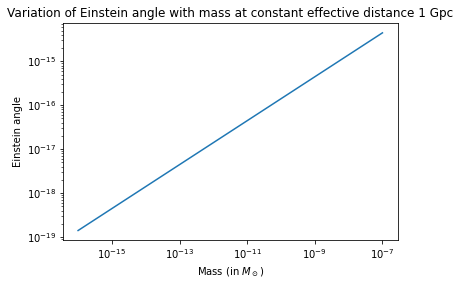

In [5]:
tmp_M = np.logspace(-16, -7, 10)
tmp_theta_E = Einstein_angle(tmp_M, 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mass (in $M_\odot$)')
plt.ylabel('Einstein angle')
plt.title('Variation of Einstein angle with mass at constant effective distance 1 Gpc')
plt.plot(tmp_M, tmp_theta_E)

In [6]:
def Lensing_potential(theta, theta_E):
    return (theta_E**2 * np.log(theta))

In [24]:
def theta_plus(beta, theta_E):
    return (1/2*(beta + np.sqrt(beta**2 + theta_E**2)))

def theta_minus(beta, theta_E):
    return (1/2*(beta - np.sqrt(beta**2 + theta_E**2)))

def time_delay(u, theta_E, D, z_L):
    beta = u*theta_E
    return np.abs((1/c * (D*Gpc)) * (1 + z_L) * ((theta_plus(beta, theta_E) - beta)**2/2 - (theta_minus(beta, theta_E) - beta)**2/2 - 
                                     theta_E**2 * np.log(np.abs(theta_plus(beta, theta_E)/theta_minus(beta, theta_E)))))

# Question

Lensing potentiat expression for point lens?

In [8]:
def phase_shift(omega, Delta_td):
    return (omega*Delta_td)

In [9]:
def mu_plus(u):
    return np.abs(1/2 + (u**2 + 2)/(2*u*np.sqrt(u**2 + 4)))

def mu_minus(u):
    return np.abs(1/2 - (u**2 + 2)/(2*u*np.sqrt(u**2 + 4)))

def point_source_mag(u, Delta_phi):
    return (mu_plus(u) + mu_minus(u) + 2 * np.sqrt(mu_plus(u) * mu_minus(u)) * np.sin(Delta_phi))

$$u = \frac{\beta}{\theta_E} \ \ \ \  x = \frac{\theta}{\theta_E}$$

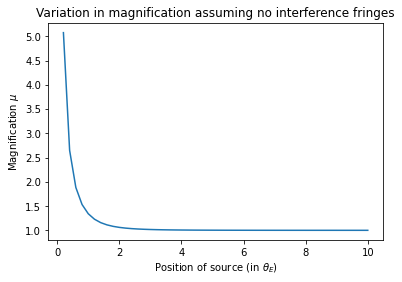

In [10]:
tmp_u = np.arange(1,51)/5
tmp_mu = point_source_mag(tmp_u, 0)
plt.title('Variation in magnification assuming no interference fringes')
plt.xlabel('Position of source (in $\\theta_E$)')
plt.ylabel('Magnification $\mu$')
plt.plot(tmp_u, tmp_mu)

- Light frequency
- Distances
- Mass of lens
- Einstein Angle
- Lensing Potential

In [13]:
# Example declaration for class light
l1 = light(10**20)

In [12]:
DS = 1
x_lens = 0.5
D = DS*(x_lens/(1-x_lens))

In [14]:
M = 1e-10
theta_E = Einstein_angle(M, D)

In [15]:
WMAP9.comoving_distance(0.12).value/1e3

0.5052514630129196

In [16]:
z_L = 0.12    # (Approx) for lens at 0.5 Gpc

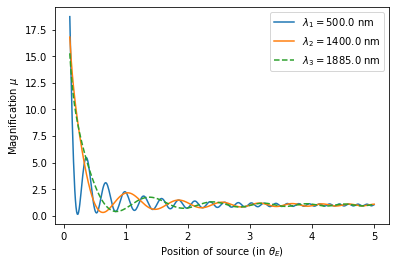

In [83]:
tmp_u = np.arange(10, 501)/100
tmp_Delta_td = time_delay(tmp_u, theta_E, D, z_L)

tmp_l1 = light(500 * 1e-9, 'lambda')    # 500 nm light
tmp_phi1 = phase_shift(tmp_l1.omega, tmp_Delta_td)
tmp_mag1 = point_source_mag(tmp_u, tmp_phi1)

tmp_l2 = light(1400 * 1e-9, 'lambda')   # 1400 nm light
tmp_phi2 = phase_shift(tmp_l2.omega, tmp_Delta_td)
tmp_mag2 = point_source_mag(tmp_u, tmp_phi2)

tmp_l3 = light(1e+15, 'omega')   # 1400 nm light
tmp_phi3 = phase_shift(tmp_l3.omega, tmp_Delta_td)
tmp_mag3 = point_source_mag(tmp_u, tmp_phi3)

plt.plot(tmp_u, tmp_mag1, label = '$\lambda_1 = $'+str(np.round(tmp_l1.lmbda*1e9))+' nm')
plt.plot(tmp_u, tmp_mag2, label = '$\lambda_2 = $'+str(np.round(tmp_l2.lmbda*1e9))+' nm')
plt.plot(tmp_u, tmp_mag3, '--', label = '$\lambda_3 = $'+str(np.round(tmp_l3.lmbda*1e9))+' nm')

plt.xlabel('Position of source (in $\\theta_E$)')
plt.ylabel('Magnification $\mu$')
plt.legend()

In [84]:
tmp_l3.omega*tmp_Delta_td[90]

5.466902810997799

In [146]:
WMAP9.comoving_distance(2)

<Quantity 5291.73037438 Mpc>

# Question

How to use https://stackoverflow.com/questions/43610906/very-large-array-handling-with-astropy-and-numpy

In [230]:
def sim_lens_plane(epsilon, M, DS, x_lens, num_sides, grid_length_factor, omega, excluded_mag):

    DL = x_lens*DS
    DLS = DS - DL
    D = DS*DL/DLS
    
    theta_E = Einstein_angle(M, D)
    
    mu = np.zeros([num_sides,num_sides])
    
    beta = np.zeros([num_sides,num_sides])
    u = np.zeros([num_sides,num_sides])
    
    count = 0
    grid_length = 2*grid_length_factor*theta_E
    pixel_length = grid_length/num_sides

    tmp_x = np.outer(np.ones(num_sides), (np.arange(int(-num_sides/2), int(num_sides/2)) + 0.5)*pixel_length)
    tmp_y = np.outer((np.arange(int(-num_sides/2), int(num_sides/2)) + 0.5)*pixel_length, np.ones(num_sides))

    beta = np.sqrt(tmp_x**2 + tmp_y**2)
    u = beta/theta_E
    
    z_L = 0.12
    Delta_phi = omega*time_delay(u, theta_E, D, z_L)
    mu = point_source_mag(u, Delta_phi)
    if (excluded_mag != -1):
        mu = np.where(mu > excluded_mag, 1, mu)
    count = (mu > (1+epsilon)).sum()
    print("count =",count, '/', num_sides**2) 
    print(' ')
    
    fig = plt.figure(figsize=(8,6))
    pixel_extent = grid_length/theta_E
    plt.imshow(mu, extent=[-pixel_extent, pixel_extent, -pixel_extent, pixel_extent], norm=colors.LogNorm(vmin=np.min(mu), vmax=np.max(mu)))
    plt.title("2D array of lens plane magnification distribution")
    plt.xlabel('$u_x(\Theta_E)$')
    plt.ylabel("$u_y(\Theta_E)$")

    plt.colorbar()
    plt.show()
    
    return mu

count = 148704 / 250000
 


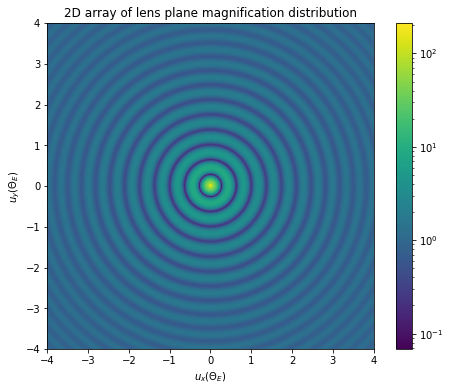

Mass of lens 1e-10
Frequency of light 1000000000000000
Maximum difference in magnification 64.72395132547375


In [231]:
l1 = light(10**15)    # Input Frequency in Hertz
epsilon = 0
M = 1e-10
DS = 1
x_lens = 0.5
num_sides = 500
grid_length_factor = 2

mu = sim_lens_plane(epsilon, M, DS, x_lens, num_sides, grid_length_factor, l1.omega, -1)
print('Mass of lens', M)
print('Frequency of light', l1.nu)
print('Maximum difference in magnification', np.max(mu[:int(num_sides/2) - 2, :int(num_sides/2) - 2]) - np.min(mu))

## Temporal Variations

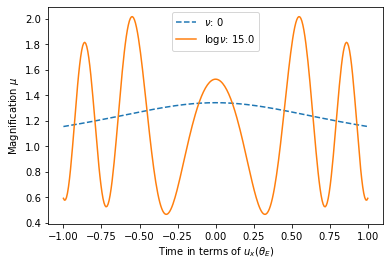

In [223]:
u_0 = 1
terminal_pos = 1
num_intervals = 301

M = 1e-10

DS = 1
x_lens = 0.5
z_L = 0.12
D = DS*(x_lens/(1-x_lens))

theta_E = Einstein_angle(M, D)

tmp_l = np.array([light(10**15), light(10**16), light(10**17), light(10**18), light(10**19), light(10**20)])

tmp_xt = np.linspace(-terminal_pos, terminal_pos, num_intervals)
tmp_y = u_0

tmp_u = np.sqrt(tmp_xt**2 + tmp_y**2)

tmp_mu_without_interference = point_source_mag(tmp_u, 0)
plt.plot(tmp_xt, tmp_mu_without_interference, '--', label = '$\\nu$: '+str(0))
plt.xlabel('Time in terms of $u_x(\\theta_E)$')
plt.ylabel('Magnification $\mu$')
                  
for i in range(1):
    tmp_Delta_phi = tmp_l[i].omega * time_delay(tmp_u, theta_E, D, z_L)
    tmp_mu_with_interference = point_source_mag(tmp_u, tmp_Delta_phi)
    plt.plot(tmp_xt, tmp_mu_with_interference, label = '$\log \\nu$: '+str(np.log10(tmp_l[i].nu)))
    
plt.legend()